In [1]:
# This is the import cell
import sys
import os
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.lines import Line2D
from matplotlib.ticker import MultipleLocator, FormatStrFormatter
first = True
pd.set_option('display.max_columns', None)
pd.set_option("display.max_rows", 10)

# Here are my rc parameters for matplotlib
mpl.rc('font', serif='Helvetica Neue') 
mpl.rcParams.update({'font.size': 9})
mpl.rcParams['figure.figsize'] = 3.2, 2.8
mpl.rcParams['figure.dpi'] = 2000
mpl.rcParams['xtick.direction'] = 'in'
mpl.rcParams['ytick.direction'] = 'in'
mpl.rcParams['lines.linewidth'] = 0.5
mpl.rcParams['axes.linewidth'] = 1.5

In [2]:
# Get the current path
if first:
    parent = os.getcwd()
os.chdir(parent)

# Grab file names from data folder
dens = os.listdir('densities')
try:
    data.remove('.DS_Store')
except:
    print(".DS_Store not in directory")

# Grab the MCS data
pres = os.listdir('pressures')
try:
    pres.remove('.DS_Store')
except:
    print(".DS_Store not in directory")

.DS_Store not in directory
.DS_Store not in directory


In [3]:
# Some functions to get the relevant data from the filenames
def checkFile(fname, string):
    for i in xrange(len(fname)):
        if fname[i] == string[0]:
#             print"{} matches {}".format(fname[i], string[0])
            for j in xrange(1, len(string)):
                if (i + j) > (len(fname) - 1):
                    break
                elif fname[i + j] == string[j]:
#                     print"{} matches {}".format(fname[i+j], string[j])
                    if j == (len(string) - 1):
#                         print"Final match!"
                        return True
                else:
                    break
    return False
    
def txtValue(fname, string):
    out = ""
    index = 0
    for i in xrange(len(fname)):
        if fname[i] == string[0]:
            for j in xrange(1, len(string)):
                if (i + j) > (len(fname) - 1):
                    break
                elif fname[i + j] == string[j]:
                    if j == (len(string) - 1):
                        # Last index of search string
                        index = i + j
                else:
                    break
                        
    # First index of value
    index += 1
    mybool = True
    while mybool:
        if fname[index].isdigit():
            out = out + fname[index]
            index += 1
        elif fname[index] == ".":    
            if fname[index+1].isdigit():
                out = out + fname[index]
                index += 1
            else:
                mybool = False
        else:
            mybool = False
    return float(out)

# Sorting functions
def multiSort(arr1, arr2, arr3, arr4):
    """Sort an array the slow (but certain) way, returns original indices in sorted order"""
    # Doing this for PeR, PeS, xS in this case
    cpy1 = np.copy(arr1)
    cpy2 = np.copy(arr2)
    cpy3 = np.copy(arr3)
    cpy4 = np.copy(arr4)
    ind = np.arange(0, len(arr1))
    for i in xrange(len(cpy1)):
        for j in xrange(len(cpy1)):
            # Sort by first variable
            if cpy1[i] > cpy1[j] and i < j:
                # Swap copy array values
                cpy1[i], cpy1[j] = cpy1[j], cpy1[i]
                cpy2[i], cpy2[j] = cpy2[j], cpy2[i]
                cpy3[i], cpy3[j] = cpy3[j], cpy3[i]
                cpy4[i], cpy4[j] = cpy4[j], cpy4[i]
                # Swap the corresponding indices
                ind[i], ind[j] = ind[j], ind[i]
                
            # If first variable is equal, resort to second variable
            elif cpy1[i] == cpy1[j] and cpy2[i] > cpy2[j] and i < j:
                # Swap copy array values
                cpy1[i], cpy1[j] = cpy1[j], cpy1[i]
                cpy2[i], cpy2[j] = cpy2[j], cpy2[i]
                cpy3[i], cpy3[j] = cpy3[j], cpy3[i]
                cpy4[i], cpy4[j] = cpy4[j], cpy4[i]
                # Swap the corresponding indices
                ind[i], ind[j] = ind[j], ind[i]
                
            elif cpy1[i] == cpy1[j] and cpy2[i] == cpy2[j] and cpy3[i] > cpy3[j] and i < j:
                # Swap copy array values
                cpy1[i], cpy1[j] = cpy1[j], cpy1[i]
                cpy2[i], cpy2[j] = cpy2[j], cpy2[i]
                cpy3[i], cpy3[j] = cpy3[j], cpy3[i]
                cpy4[i], cpy4[j] = cpy4[j], cpy4[i]
                # Swap the corresponding indices
                ind[i], ind[j] = ind[j], ind[i]
            elif cpy1[i] == cpy1[j] and cpy2[i] == cpy2[j] and cpy3[i] == cpy3[j] and cpy4[i] > cpy4[j] and i < j:
                # Swap copy array values
                cpy1[i], cpy1[j] = cpy1[j], cpy1[i]
                cpy2[i], cpy2[j] = cpy2[j], cpy2[i]
                cpy3[i], cpy3[j] = cpy3[j], cpy3[i]
                cpy4[i], cpy4[j] = cpy4[j], cpy4[i]
                # Swap the corresponding indices
                ind[i], ind[j] = ind[j], ind[i]
    return ind

def indSort(arr1, arr2):
    """Take sorted index array, use to sort array"""
    # arr1 is array to sort
    # arr2 is index array
    cpy = np.copy(arr1)
    for i in xrange(len(arr1)):
        arr1[i] = cpy[arr2[i]]

In [4]:
# Grab parameters, sort them
chkStrings = ["pe", "pa", "pb", "xa", "ep", "phi", "cluster", "dtau"]
default = [0., 0., 0., 100., 1., 60., 0, 0.000001]
storeVals = [[] for i in chkStrings]
for i in dens:
    for j in range(0, len(chkStrings)):
        if chkStrings[j] != "cluster":
            if checkFile(i, chkStrings[j]):
                storeVals[j].append(txtValue(i, chkStrings[j]))
            else:
                storeVals[j].append(default[j])  
        else:
            if checkFile(i, chkStrings[j]):
                storeVals[j].append(1)
            else:
                storeVals[j].append(default[j]) 

# Sort the arrays
if len(storeVals[0]) > 1:
    # Sort them!
    print("Sorting... ")
    # Sort by: pe, phi, epsilon, cluster
    indArr = multiSort(storeVals[chkStrings.index("pa")],
                       storeVals[chkStrings.index("phi")],
                       storeVals[chkStrings.index("ep")],
                       storeVals[chkStrings.index("cluster")])
    indSort(dens, indArr)
    for i in storeVals:
        indSort(i, indArr)
    
# Now that the data is sorted, read it into a dataframe
all_dens = []
os.chdir(parent)
os.chdir('densities')
for i in dens:
    print(i)
    df = pd.read_csv(i, sep='\s+', header=0)
    all_dens.append(df)
os.chdir(parent)

# This is how you access the data at different levels
display(all_dens[0])

Sorting... 
cluster_phase_density_pa100.0_pb0.0_xa100.0_phi45_ep0.001.txt
cluster_phase_density_pa100.0_pb0.0_xa100.0_phi45_ep0.010.txt
cluster_phase_density_pa100.0_pb0.0_xa100.0_phi55_ep0.001.txt
cluster_phase_density_pa100.0_pb0.0_xa100.0_phi55_ep0.010.txt
cluster_phase_density_pa100.0_pb0.0_xa100.0_phi65_ep0.001.txt
cluster_phase_density_pa100.0_pb0.0_xa100.0_phi65_ep0.010.txt
cluster_phase_density_pa200.0_pb0.0_xa100.0_phi45_ep0.001.txt
cluster_phase_density_pa200.0_pb0.0_xa100.0_phi45_ep0.010.txt
cluster_phase_density_pa200.0_pb0.0_xa100.0_phi55_ep0.001.txt
cluster_phase_density_pa200.0_pb0.0_xa100.0_phi55_ep0.010.txt
cluster_phase_density_pa200.0_pb0.0_xa100.0_phi65_ep0.001.txt
cluster_phase_density_pa200.0_pb0.0_xa100.0_phi65_ep0.010.txt
cluster_phase_density_pa300.0_pb0.0_xa100.0_phi45_ep0.001.txt
cluster_phase_density_pa300.0_pb0.0_xa100.0_phi45_ep0.010.txt
cluster_phase_density_pa300.0_pb0.0_xa100.0_phi55_ep0.001.txt
cluster_phase_density_pa300.0_pb0.0_xa100.0_phi55_ep0.010.

,Timestep,Gas-r=1.0,Liq-r=1.0,Gas-r=1.5,Liq-r=1.5,Gas-r=2.0,Liq-r=2.0,Gas-r=2.5,Liq-r=2.5,Gas-r=3.0,Liq-r=3.0,Gas-r=3.5,Liq-r=3.5,Gas-r=4.0,Liq-r=4.0,Gas-r=4.5,Liq-r=4.5,Gas-r=5.0,Liq-r=5.0
0,10.0,0.25,0.5,0.44,0.555,0.435,0.5,0.435,0.48,0.44,0.47,0.445,0.465,0.435,0.465,0.43,0.455,0.420,0.455
1,20.0,0.25,0.5,0.44,0.555,0.435,0.5,0.435,0.48,0.44,0.47,0.445,0.465,0.435,0.465,0.43,0.455,0.420,0.455
2,30.0,0.25,0.5,0.44,0.555,0.435,0.5,0.435,0.48,0.44,0.47,0.445,0.465,0.435,0.465,0.44,0.455,0.420,0.455
3,40.0,0.25,0.5,0.44,0.555,0.435,0.5,0.435,0.48,0.44,0.47,0.445,0.465,0.435,0.465,0.44,0.455,0.420,0.455
4,50.0,0.25,0.5,0.44,0.555,0.435,0.5,0.435,0.48,0.44,0.47,0.445,0.465,0.435,0.465,0.43,0.455,0.420,0.455
5,60.0,0.25,0.5,0.44,0.555,0.435,0.5,0.435,0.48,0.44,0.47,0.445,0.465,0.435,0.465,0.44,0.455,0.420,0.455
6,70.0,0.25,0.5,0.44,0.555,0.435,0.5,0.435,0.48,0.44,0.47,0.445,0.465,0.435,0.465,0.44,0.455,0.420,0.455
7,80.0,0.25,0.5,0.44,0.555,0.435,0.5,0.435,0.48,0.44,0.47,0.445,0.465,0.435,0.465,0.44,0.455,0.420,0.455
8,90.0,0.25,0.5,0.44,0.555,0.435,0.5,0.435,0.48,0.44,0.47,0.445,0.465,0.435,0.465,0.44,0.455,0.405,0.455
9,100.0,0.25,0.5,0.44,0.555,0.435,0.5,0.435,0.48,0.44,0.47,0.445,0.465,0.435,0.465,0.44,0.455,0.430,0.455


In [5]:
# Grab parameters, sort them
chkStrings = ["pe", "pa", "pb", "xa", "ep", "phi", "cluster", "dtau"]
default = [0., 0., 0., 100., 1., 60., 0, 0.000001]
storeVals = [[] for i in chkStrings]
for i in pres:
    for j in range(0, len(chkStrings)):
        if chkStrings[j] != "cluster":
            if checkFile(i, chkStrings[j]):
                storeVals[j].append(txtValue(i, chkStrings[j]))
            else:
                storeVals[j].append(default[j])  
        else:
            if checkFile(i, chkStrings[j]):
                storeVals[j].append(1)
            else:
                storeVals[j].append(default[j]) 

# Sort the arrays
if len(storeVals[0]) > 1:
    # Sort them!
    print("Sorting... ")
    # Sort by: pe, phi, epsilon, cluster
    indArr = multiSort(storeVals[chkStrings.index("pa")],
                       storeVals[chkStrings.index("phi")],
                       storeVals[chkStrings.index("ep")],
                       storeVals[chkStrings.index("cluster")])
    indSort(pres, indArr)
    for i in storeVals:
        indSort(i, indArr)
    
# Now that the data is sorted, read it into a dataframe
all_pres = []
os.chdir(parent)
os.chdir('pressures')
for i in pres:
    print(i)
    df = pd.read_csv(i, sep='\s+', header=0)
    all_pres.append(df)
os.chdir(parent)

# This is how you access the data at different levels
display(all_pres[-1])

Sorting... 
cluster_pressure_pa100.0_pb0.0_xa100.0_phi45_ep0.001.txt
cluster_pressure_pa100.0_pb0.0_xa100.0_phi45_ep0.010.txt
cluster_pressure_pa100.0_pb0.0_xa100.0_phi55_ep0.001.txt
cluster_pressure_pa100.0_pb0.0_xa100.0_phi55_ep0.010.txt
cluster_pressure_pa100.0_pb0.0_xa100.0_phi65_ep0.001.txt
cluster_pressure_pa100.0_pb0.0_xa100.0_phi65_ep0.010.txt
cluster_pressure_pa200.0_pb0.0_xa100.0_phi45_ep0.001.txt
cluster_pressure_pa200.0_pb0.0_xa100.0_phi45_ep0.010.txt
cluster_pressure_pa200.0_pb0.0_xa100.0_phi55_ep0.001.txt
cluster_pressure_pa200.0_pb0.0_xa100.0_phi55_ep0.010.txt
cluster_pressure_pa200.0_pb0.0_xa100.0_phi65_ep0.001.txt
cluster_pressure_pa200.0_pb0.0_xa100.0_phi65_ep0.010.txt
cluster_pressure_pa300.0_pb0.0_xa100.0_phi45_ep0.001.txt
cluster_pressure_pa300.0_pb0.0_xa100.0_phi45_ep0.010.txt
cluster_pressure_pa300.0_pb0.0_xa100.0_phi55_ep0.001.txt
cluster_pressure_pa300.0_pb0.0_xa100.0_phi55_ep0.010.txt
cluster_pressure_pa300.0_pb0.0_xa100.0_phi65_ep0.001.txt
cluster_pressure_pa

,Timestep,gasArea,gasTrace,gasPress,bulkArea,bulkTrace,bulkPress,SurfaceTense,Length
0,100.0,100718.177,504997.306,5.014,17676.427,2.342321e+08,13251.097,7569746.267,571.5


In [6]:
# Grab the parameters from each file, store in a dataframe
headers = ['pe', 'peA', 'peB', 'xA', 'eps', 'phi', 'tauPer_dt']
params = pd.DataFrame(columns=headers)
for i in range(0, len(all_dens)):
    pe = int(storeVals[chkStrings.index("pe")][i])
    pa = int(storeVals[chkStrings.index("pa")][i])
    pb = int(storeVals[chkStrings.index("pb")][i])
    xa = float(storeVals[chkStrings.index("xa")][i])
    ep = float(storeVals[chkStrings.index("ep")][i])
    phi = float(storeVals[chkStrings.index("phi")][i])
    dtau = float(storeVals[chkStrings.index("dtau")][i])
    df = pd.DataFrame([[pe, pa, pb, xa, ep, phi, dtau]], columns=headers)
    params = params.append(df, ignore_index = True)
display(params)

,pe,peA,peB,xA,eps,phi,tauPer_dt
0,0,100,0,100.0,0.001,45.0,0.000001
1,0,100,0,100.0,0.010,45.0,0.000001
2,0,100,0,100.0,0.001,55.0,0.000001
3,0,100,0,100.0,0.010,55.0,0.000001
4,0,100,0,100.0,0.001,65.0,0.000001
...,...,...,...,...,...,...,...
23,0,500,0,100.0,0.001,45.0,0.000001
24,0,500,0,100.0,0.010,45.0,0.000001
25,0,500,0,100.0,0.001,55.0,0.000001
26,0,500,0,100.0,0.010,55.0,0.000001


In [7]:
# Let's add columns to the time-resolved simulation data
for i in xrange(len(all_dens)):
    # Ger rid of NaN in favor of 0
    all_dens[i].fillna(0, inplace=True)

headers=list(all_dens[0])
display(all_dens[0])
print(all_dens[0][headers[1]][0])
print(all_dens[0][headers[2]][0])

,Timestep,Gas-r=1.0,Liq-r=1.0,Gas-r=1.5,Liq-r=1.5,Gas-r=2.0,Liq-r=2.0,Gas-r=2.5,Liq-r=2.5,Gas-r=3.0,Liq-r=3.0,Gas-r=3.5,Liq-r=3.5,Gas-r=4.0,Liq-r=4.0,Gas-r=4.5,Liq-r=4.5,Gas-r=5.0,Liq-r=5.0
0,10.0,0.25,0.5,0.44,0.555,0.435,0.5,0.435,0.48,0.44,0.47,0.445,0.465,0.435,0.465,0.43,0.455,0.420,0.455
1,20.0,0.25,0.5,0.44,0.555,0.435,0.5,0.435,0.48,0.44,0.47,0.445,0.465,0.435,0.465,0.43,0.455,0.420,0.455
2,30.0,0.25,0.5,0.44,0.555,0.435,0.5,0.435,0.48,0.44,0.47,0.445,0.465,0.435,0.465,0.44,0.455,0.420,0.455
3,40.0,0.25,0.5,0.44,0.555,0.435,0.5,0.435,0.48,0.44,0.47,0.445,0.465,0.435,0.465,0.44,0.455,0.420,0.455
4,50.0,0.25,0.5,0.44,0.555,0.435,0.5,0.435,0.48,0.44,0.47,0.445,0.465,0.435,0.465,0.43,0.455,0.420,0.455
5,60.0,0.25,0.5,0.44,0.555,0.435,0.5,0.435,0.48,0.44,0.47,0.445,0.465,0.435,0.465,0.44,0.455,0.420,0.455
6,70.0,0.25,0.5,0.44,0.555,0.435,0.5,0.435,0.48,0.44,0.47,0.445,0.465,0.435,0.465,0.44,0.455,0.420,0.455
7,80.0,0.25,0.5,0.44,0.555,0.435,0.5,0.435,0.48,0.44,0.47,0.445,0.465,0.435,0.465,0.44,0.455,0.420,0.455
8,90.0,0.25,0.5,0.44,0.555,0.435,0.5,0.435,0.48,0.44,0.47,0.445,0.465,0.435,0.465,0.44,0.455,0.405,0.455
9,100.0,0.25,0.5,0.44,0.555,0.435,0.5,0.435,0.48,0.44,0.47,0.445,0.465,0.435,0.465,0.44,0.455,0.430,0.455


0.25
0.5


Totals


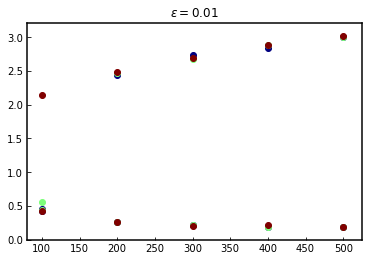

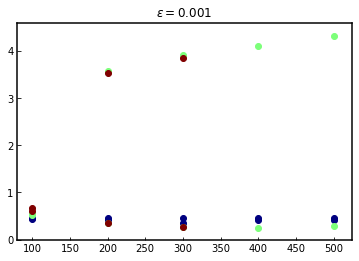

In [8]:
# Let's try and plot phiG and phiC vs peNet
print("Totals")
gas = "Gas-r=5.0"
liq = "Liq-r=5.0"

distEps = []
for i in range(0, len(params)):
    if params['eps'][i] not in distEps:
        distEps.append(params['eps'][i])
distEps.sort(reverse=True)
        
for j in distEps:
    for i in range(0, len(all_dens)):
        if params['eps'][i] == j:
            plt.scatter(params['peA'][i], all_dens[i][gas].iloc[-1], c=plt.cm.jet((params['phi'][i]-45)/20.))
            plt.scatter(params['peA'][i], all_dens[i][liq].iloc[-1], c=plt.cm.jet((params['phi'][i]-45)/20.))
    plt.title(r"$\epsilon=$" + str(j))
    plt.show()

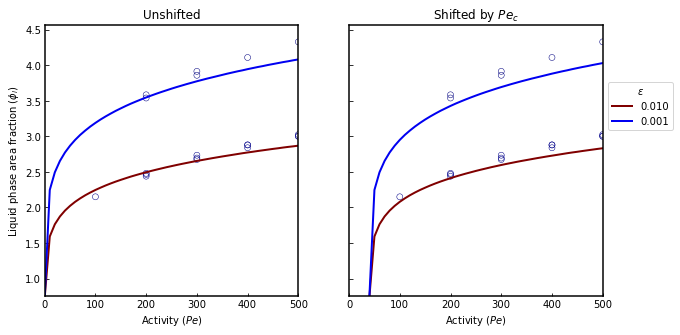

In [9]:
# Lennard-Jones force
def ljForce(r, eps, sigma=1.):
    div = (sigma/r)
    dU = (24. * eps / r) * ((2*(div**12)) - (div)**6)
    return dU

def avgCollisionForce(pe):
    '''Computed from the integral of possible angles'''
    # We obtain this by vectorizing the collision force
    # and taking the magnitude of the resultant vector
    magnitude = np.sqrt(28.)
    # These answeres differ by a factor of 4/3
#     return (magnitude * 4. * pe) / (np.pi * np.pi)
    # This was Ehssan's solution
    return (magnitude * pe) / (np.pi)
    # This is w/ 3-body collisions as a summation
#     return magnitude * pe * 0.52

# From area fraction, get lattice spacing
def phiToLat(phiIn):
    '''Read in phi, output the lattice spacing'''
    phiCP = np.pi / (2. * np.sqrt(3.))
    latCP = 1.
    return np.sqrt(phiCP / phiIn)

# From lattice spacing, get area fraction
def latToPhi(latIn):
    '''Read in lattice spacing, output phi'''
    phiCP = np.pi / (2. * np.sqrt(3.))
    latCP = 1.
    return phiCP / (latIn**2)

# Let's do this at constant epsilon
def convergeConstEps(pe, eps):
    out = []
    for i in pe:
        r = 1.112
        while ljForce(r, eps) < avgCollisionForce(i):
            r -= 0.0001
        out.append(latToPhi(r))
    return out

# Let's see how the data fits onto the predicted LJ curve
epsRange = np.arange(0.1, 1.1, 0.9)
epsRange = [0.01, 0.001]
peRange = np.arange(0., 600., 10.)

# Get phi vs pe at constant epsilon
shift = 0.
shift = 40.
fig, ax = plt.subplots(1, 2, sharex=True, figsize=(10, 5))
for i in epsRange:
    ax[0].plot(peRange, convergeConstEps(peRange, i), c=plt.cm.jet(i/max(epsRange)), label="{0:.3f}".format(i), lw=2.0)
    ax[1].plot(peRange+shift, convergeConstEps(peRange, i), c=plt.cm.jet(i/max(epsRange)), label="{0:.3f}".format(i), lw=2.0)
ax[1].legend(title=r'$\epsilon$', loc='center', bbox_to_anchor=(1.15, 0.7))
ax[0].set_xlabel(r'Activity $(Pe)$')
ax[1].set_xlabel(r'Activity $(Pe)$')
ax[0].set_ylabel(r'Liquid phase area fraction $(\phi_{l})$')

# Overlay data on top of this
GAS="Gas-r=5.0"
LIQ="Liq-r=5.0"
for i in range(0, len(epsRange)):
    for j in range(0, len(all_dens)):
        if params['eps'][j] == epsRange[i]:
                ax[0].scatter(params['peA'][j], all_dens[j][LIQ].iloc[-1],
                              edgecolor=plt.cm.jet(epsRange[i]), facecolor='none',
                              lw=0.5)
                ax[1].scatter(params['peA'][j], all_dens[j][LIQ].iloc[-1],
                              edgecolor=plt.cm.jet(epsRange[i]), facecolor='none',
                              lw=0.5)
# ax[0].set_xlim(0, 500)
ax[0].set_xlim(0., 500.)
ax[0].set_ylim(0.75,)
# ax[1].set_xlim(0, 500)
ax[1].set_xlim(0., 500.)
ax[1].set_ylim(0.75,)
ax[0].set_title('Unshifted')
ax[1].set_title(r'Shifted by $Pe_{c}$')
ax[1].set_yticklabels([])

plt.show()

[45.0, 55.0, 65.0]


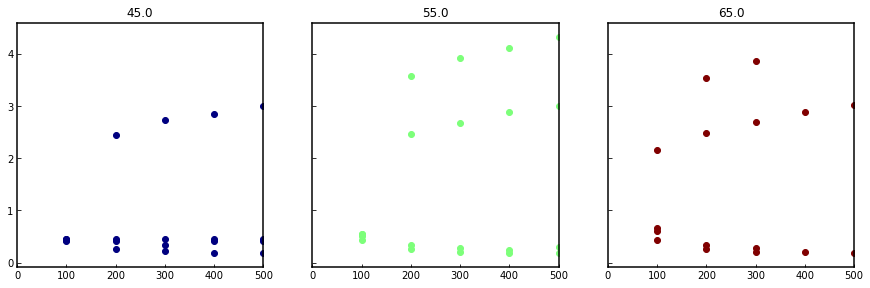

In [10]:
# Let's plot the first 4 densities side-by-side
uniquePhi = []
for i in storeVals[chkStrings.index("phi")]:
    if i not in uniquePhi:
        uniquePhi.append(i)
print(uniquePhi)

fig, ax = plt.subplots(1, len(uniquePhi), figsize=(len(uniquePhi) * 5, len(uniquePhi) * 1.5), sharey=True)
for k in range(0, len(uniquePhi)):
    for i in range(0, len(all_dens)):
        if params['phi'][i] == uniquePhi[k]:
            ax[k].scatter(params['peA'][i], all_dens[i][gas].iloc[-1], c=plt.cm.jet((params['phi'][i]-45)/20.))
            ax[k].scatter(params['peA'][i], all_dens[i][liq].iloc[-1], c=plt.cm.jet((params['phi'][i]-45)/20.))
    ax[k].set_xlim(0, 500.)
#         ax[k].set_ylim(0, 1.6)
    ax[k].set_title(uniquePhi[k])
plt.subplots_adjust(hspace=0.5)
plt.show()


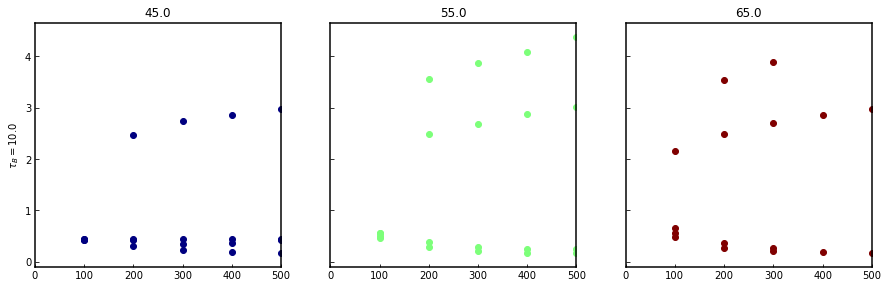

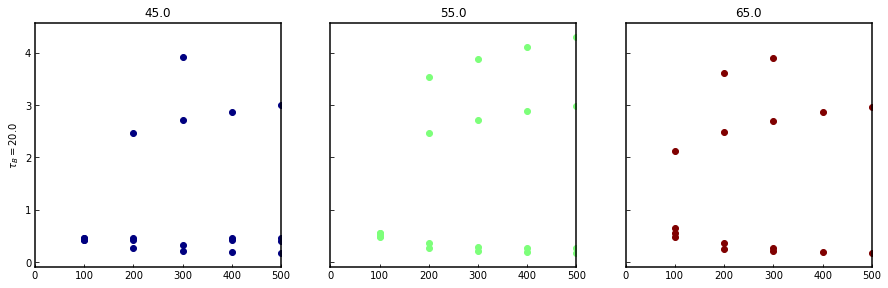

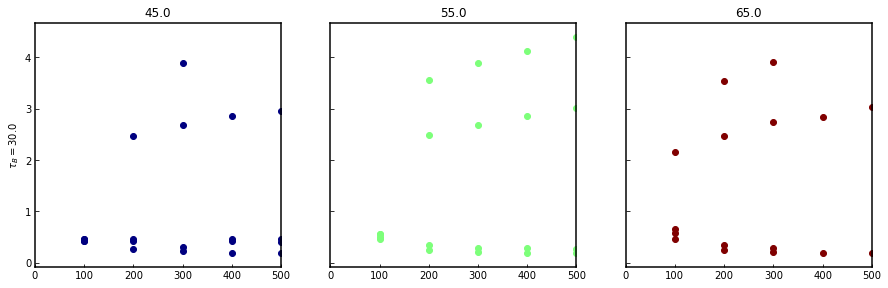

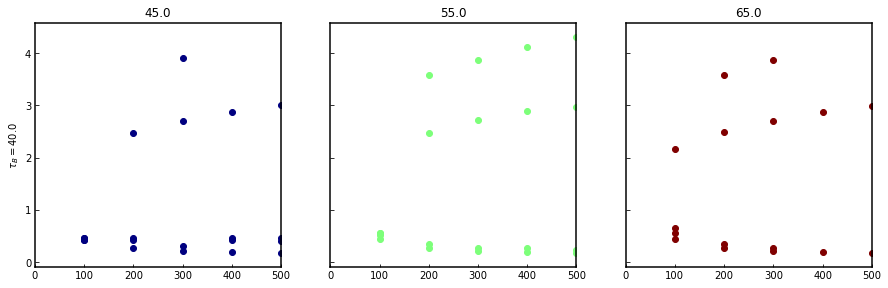

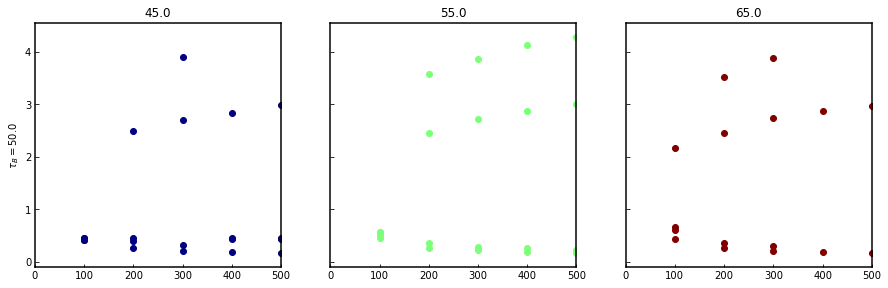

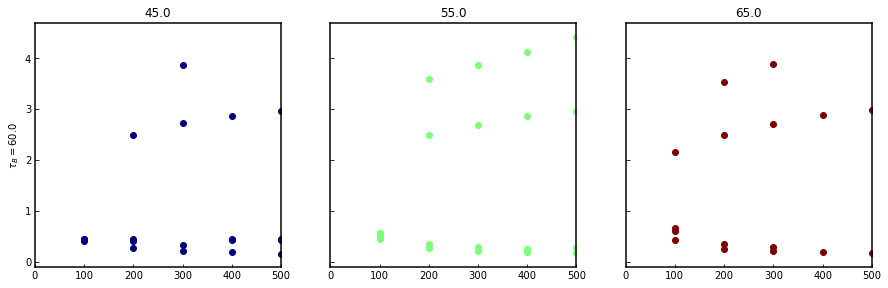

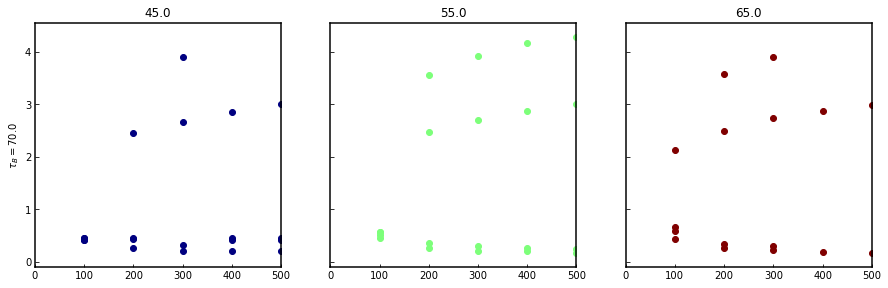

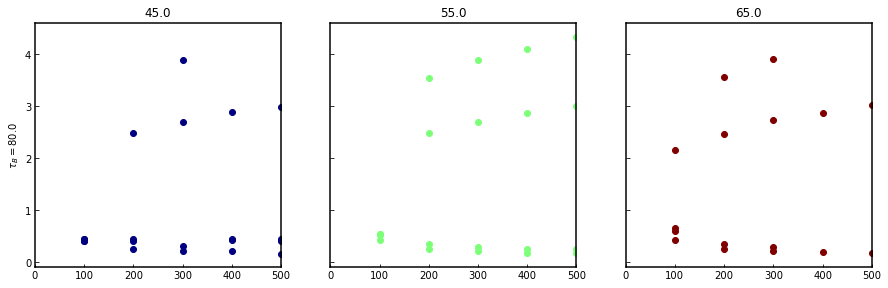

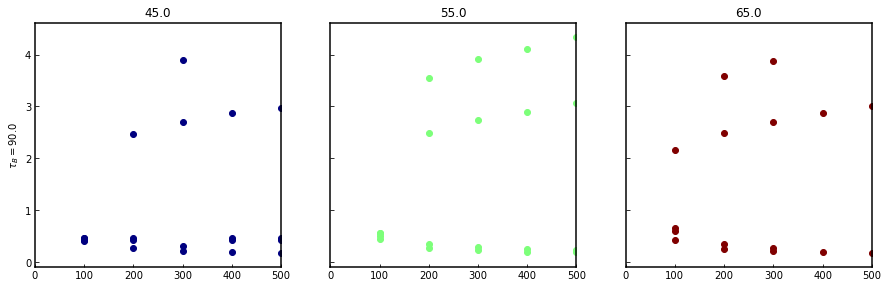

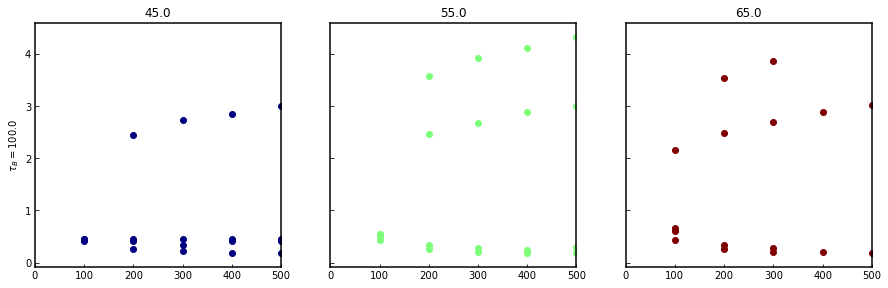

In [11]:
# Let's plot the first 4 densities side-by-side
for m in range(0, len(all_dens[0])):
    fig, ax = plt.subplots(1, len(uniquePhi), figsize=(len(uniquePhi) * 5, len(uniquePhi) * 1.5), sharey=True)
    for k in range(0, len(uniquePhi)):
        for i in range(0, len(all_dens)):
            if params['phi'][i] == uniquePhi[k]:
                ax[k].scatter(params['peA'][i], all_dens[i][gas][m], c=plt.cm.jet((params['phi'][i]-45)/20.))
                ax[k].scatter(params['peA'][i], all_dens[i][liq][m], c=plt.cm.jet((params['phi'][i]-45)/20.))
        ax[k].set_xlim(0, 500.)
    #         ax[k].set_ylim(0, 1.6)
        ax[k].set_title(uniquePhi[k])
    ax[0].set_ylabel(r'$\tau_{B}=$' + str(all_dens[i]['Timestep'][m]))
    plt.subplots_adjust(hspace=0.5)
    plt.show()

In [12]:
# Stopped editing this code here...

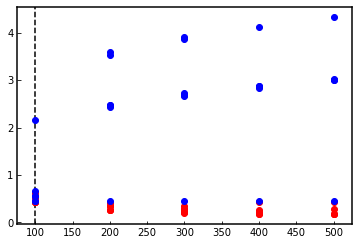

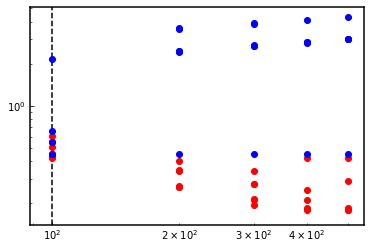

In [13]:
# Let's get an analytical expression for the local density of each phase
#  as a function of activity.
peFit = []
gas = 'Gas-r=5.0'
gasList = []
liq = 'Liq-r=5.0'
liqList = []
# dens = 50.0
for i in xrange(len(all_dens)):
#     if params['phi'][i] == dens:
    peFit.append(params['peA'][i])
    gasList.append(all_dens[i][gas].iloc[-1])
    liqList.append(all_dens[i][liq].iloc[-1])

# We can cut out low Pe data (we don't need to artificially nucleate this)
peCut = 100.
# Make sure we've grabbed the appropriate data
plt.scatter(peFit, gasList, c='r')
plt.scatter(peFit, liqList, c='b')
plt.axvline(peCut, ls='--', lw=1.5, c='k', zorder=0)
# plt.xlim(40, 70)
plt.show()

# Let's trim the data so we are only fitting phase separated data
for i in range(len(peFit)-1, -1, -1):
    if peFit[i] < peCut:
        del peFit[i]
        del gasList[i]
        del liqList[i]

# Plot to observe this trimming of data
plt.scatter(peFit, gasList, c='r')
plt.scatter(peFit, liqList, c='b')
plt.axvline(peCut, ls='--', lw=1.5, c='k', zorder=0)
ax = plt.gca()
ax.set_xscale('log')
ax.set_yscale('log')
plt.show()

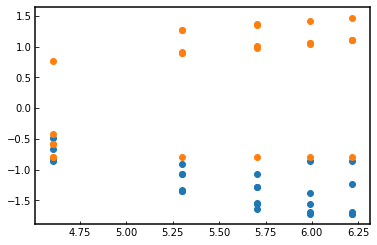

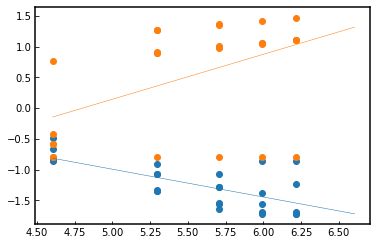

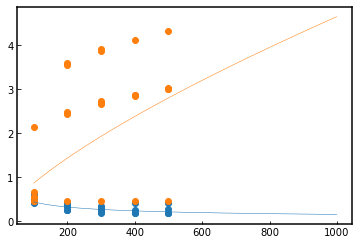

Expression for gas phase: m=-0.451962521323, b=3.54688849199
Expression for liquid phase: m=0.730381137609, b=0.0299408762503


In [14]:
# Data has been trimmed looks like a power law

# Take the natural log of the data (fit to a line in logspace)
logPe = []
logGas = []
logLiq = []
for i in xrange(len(peFit)):
    logPe.append(np.log(peFit[i]))
    logGas.append(np.log(gasList[i]))
    logLiq.append(np.log(liqList[i]))
# Plot the log of the data    
plt.scatter(logPe, logGas)
plt.scatter(logPe, logLiq)
plt.show()

# Fit using linear regression
from scipy import stats
slopeG, interceptG, r_valueG, p_valueG, std_errG = stats.linregress(logPe,logGas)
slopeL, interceptL, r_valueL, p_valueL, std_errL = stats.linregress(logPe,logLiq)
rangeLog = np.arange(np.log(peCut), np.log(1000.))
def myLine(x, m, b):
    return (m*x) + b
# Plot the log of the data    
plt.scatter(logPe, logGas)
plt.scatter(logPe, logLiq)
plt.plot(rangeLog, myLine(rangeLog, slopeG, interceptG))
plt.plot(rangeLog, myLine(rangeLog, slopeL, interceptL))
plt.show()

# Plot it in real space now
rangeDat = np.arange(peCut, 1000.)
def myPow(x, m, b):
    return (x**m)*b
plt.scatter(peFit, gasList)
plt.scatter(peFit, liqList)
plt.plot(rangeDat, myPow(rangeDat, slopeG, np.exp(interceptG)))
plt.plot(rangeDat, myPow(rangeDat, slopeL, np.exp(interceptL)))
plt.show()

print("Expression for gas phase: m={}, b={}").format(slopeG, np.exp(interceptG))
print("Expression for liquid phase: m={}, b={}").format(slopeL, np.exp(interceptL))

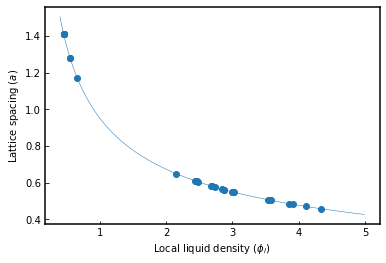

In [15]:
# Can we get the lattice spacing from the local area fraction

# We know that the lattice spacing of 1.0 has phi ~ 0.9
def phiProportion(phiIn):
    phiCP = np.pi / (2. * np.sqrt(3.))
    latCP = 1.
    return np.sqrt(phiCP / phiIn)

phis = np.arange(0.4, 5.0, 0.01)
plt.plot(phis, phiProportion(phis))
plt.scatter(liqList, phiProportion(liqList))
plt.xlabel(r'Local liquid density $(\phi_{l})$')
plt.ylabel(r'Lattice spacing $(a)$')
# plt.xlim(1., 1.5)
# plt.ylim(top=1.)
plt.show()

# print(phiProportion(1.))

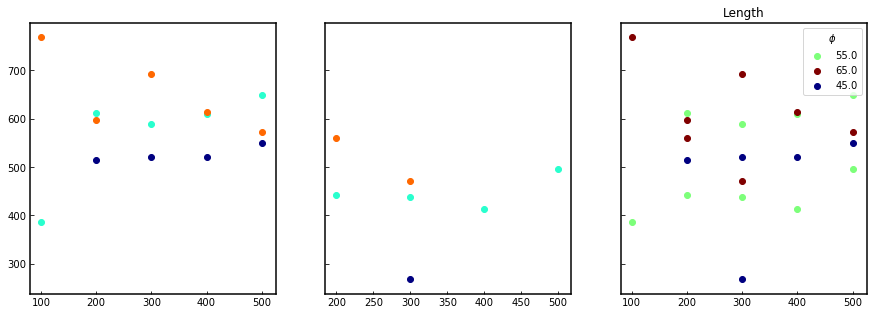

In [16]:
# Let's look at the cluster length data as it pertains to the system parameters
from collections import OrderedDict

i = 'Length'
fig, ax = plt.subplots(1, 3, figsize=(15, 5), sharey=True)
for j in range(0, len(params['peA'])):
    if not all_pres[j].empty:
        ax[2].scatter(params['peA'][j], all_pres[j][i], c=plt.cm.jet((params['phi'][j] - 45.)/20.), label=params['phi'][j])
        if params['eps'][j] == 0.01:
            ax[0].scatter(params['peA'][j], all_pres[j][i], c=plt.cm.jet((params['phi'][j] - 45.)/25.), label=params['phi'][j])
        else:
            ax[1].scatter(params['peA'][j], all_pres[j][i], c=plt.cm.jet((params['phi'][j] - 45.)/25.), label=params['phi'][j])
handles, labels = plt.gca().get_legend_handles_labels()
by_label = OrderedDict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(), title=r'$\phi$')
plt.title(i)
# ax[0].set_xlim(0, 500)
# ax[1].set_xlim(0, 500)
# ax[2].set_xlim(0, 500)
# ax[0].set_ylim(0, 200)
# ax[1].set_ylim(0, 200)
# ax[2].set_ylim(0, 200)

plt.show()

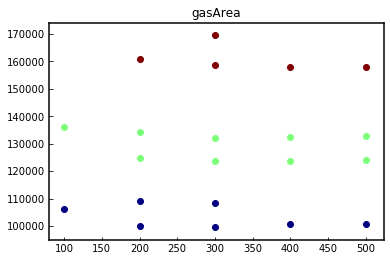

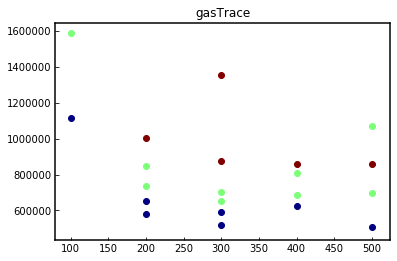

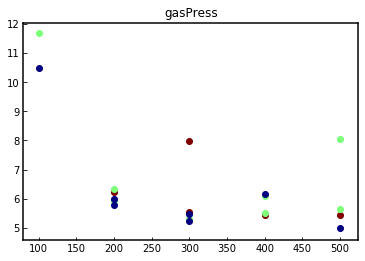

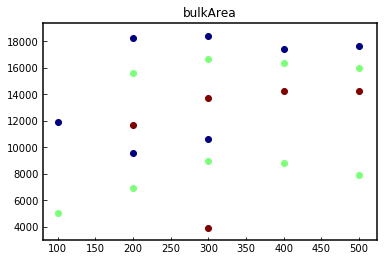

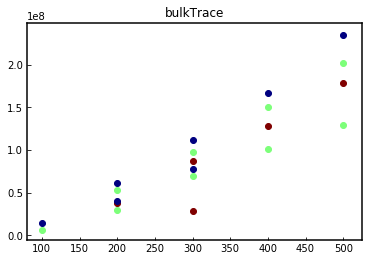

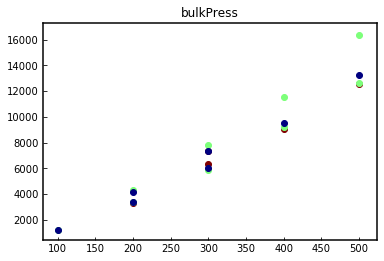

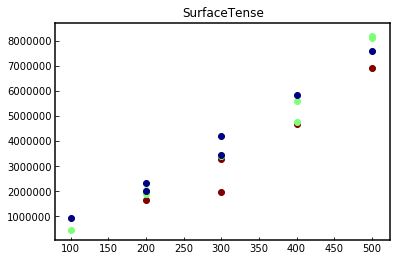

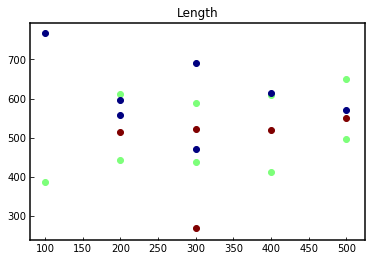

In [17]:
# Let's take a look at the pressure 
press = list(all_pres[0])
press.remove('Timestep')
for i in press:
    for j in range(0, len(all_pres)):
        if not all_pres[j].empty:
            plt.scatter(params['peA'][j], all_pres[j][i], c=plt.cm.jet((65. - params['phi'][j])/20.))
    plt.title(i)
    plt.show()

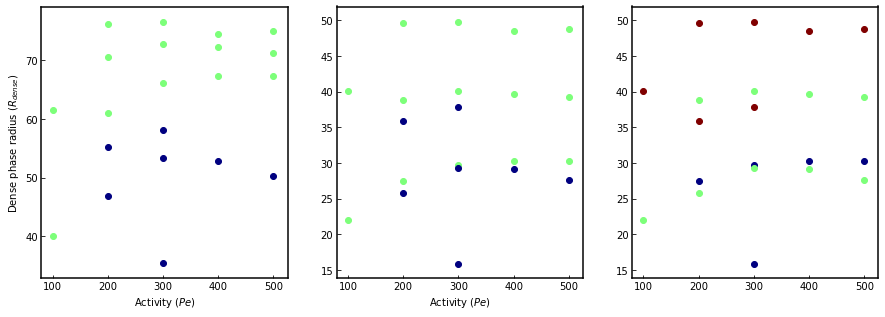

[0.0, 0.0, 0.0, 40.115894869207914, 0.0, 61.590181683883635, 0.0, 60.961576077225615, 46.9506354619304, 70.5323498242144, 55.18802033231965, 76.22775046721924, 35.39145113443756, 66.06566071379187, 53.32661327822047, 72.8766264253893, 58.172895508666144, 76.58361860651436, 0.0, 67.32967197751539, 52.9059227062036, 72.2329149794285, 74.52295830035294, 0.0, 67.28195326457632, 50.20379753821081, 71.32986452308423, 75.01054236909692]


In [59]:
# Compute the dense phase radius from the area of the dense phase
def radCurve(area):
    # From area of circle get curvature
    return np.sqrt(area/np.pi)

distEps = []
distPhi = []
for i in range(0, len(params)):
    if params['eps'][i] not in distEps:
        distEps.append(params['eps'][i])
    if params['phi'][i] not in distPhi:
        distPhi.append(params['phi'][i])

cols = []
cnt = 0.
for i in range(0, len(distEps)):
    cols.append(plt.cm.jet(cnt))
    cnt += (1./(len(distEps)))

ind = "bulkArea"
curv = []
fig, ax = plt.subplots(1, 3, figsize=(15., 5.))
for i in range(0, len(all_pres)):
    # If the dense phase exists
    if not all_pres[i].empty:
        curv.append(radCurve(all_pres[i][ind][0]))
        ax[0].scatter(params['peA'][i], curv[-1], c=cols[distEps.index(params['eps'][i])])
        ax[1].scatter(params['peA'][i], curv[-1] * (params['phi'][i] / 100.),
                      c=cols[distEps.index(params['eps'][i])])
        ax[2].scatter(params['peA'][i], curv[-1] * (params['phi'][i] / 100.),
                      c=plt.cm.jet((params['phi'][i] - 45.) / 20.))
    # If not...
    elif all_pres[i].empty:
        curv.append(0.)
ax[0].set_xlabel(r'Activity $(Pe)$')
ax[1].set_xlabel(r'Activity $(Pe)$')
ax[0].set_ylabel(r'Dense phase radius $(R_{dense})$')
plt.show()

print(curv)

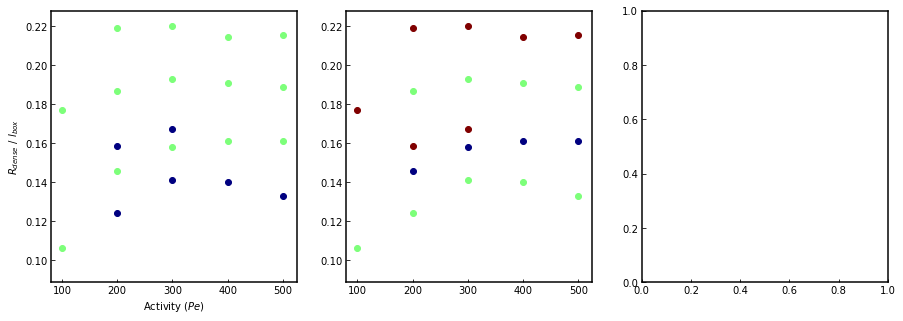

In [64]:
# For all simulatios in this file, N=100,000 I can compute l_box
def getLBox(phi, N):
    return np.sqrt(N * (np.pi * 0.25) / phi)

distLBox = []
for i in distPhi:
    distLBox.append(getLBox(i/100., 100000))
    
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
for i in range(0, len(curv)):
    if (curv[i] / distLBox[distPhi.index(params['phi'][i])]) > 0.1:
        ax[0].scatter(params['peA'][i], curv[i] / distLBox[distPhi.index(params['phi'][i])],
                      c=cols[distEps.index(params['eps'][i])])
        ax[1].scatter(params['peA'][i], curv[i] / distLBox[distPhi.index(params['phi'][i])],
                      c=plt.cm.jet((params['phi'][i] - 45.) / 20.))
ax[0].set_xlabel(r'Activity $(Pe)$')
ax[0].set_ylabel(r'$R_{dense}\ / \ l_{box}$')
plt.show()

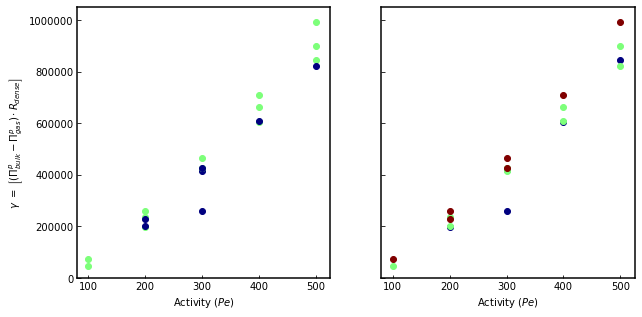

In [19]:
# Plot the simulation pressure difference times the dense phase radius
fig, ax = plt.subplots(1, 2, figsize=(10, 5), sharey=True)
for i in range(0, len(all_pres)):
    if not all_pres[i].empty:
        ax[0].scatter(params['peA'][i],
                      (all_pres[i]['bulkPress'] - all_pres[i]['gasPress']) * curv[i],
                      c=cols[distEps.index(params['eps'][i])])
        ax[1].scatter(params['peA'][i],
                      (all_pres[i]['bulkPress'] - all_pres[i]['gasPress']) * curv[i],
                      c=plt.cm.jet((params['phi'][i] - 45.) / 20.))
ax[0].set_xlabel(r'Activity $(Pe)$')
ax[1].set_xlabel(r'Activity $(Pe)$')
ax[0].set_ylabel(r'$\gamma \ = \ \left[(\Pi^{p}_{bulk} - \Pi^{p}_{gas})\cdot R_{dense}\right]$')
plt.show()

In [20]:
def avgCollisionForce(pe):
    '''Computed from the integral of possible angles'''
    # We obtain this by vectorizing the collision force
    # and taking the magnitude of the resultant vector
    magnitude = np.sqrt(28.)
    # These answeres differ by a factor of 4/3
#     return (magnitude * 4. * pe) / (np.pi * np.pi)
    # This was Ehssan's solution
    return (magnitude * pe) / (np.pi)
    # This is w/ 3-body collisions as a summation
#     return magnitude * pe * 0.52

# Lennard-Jones force
def ljForce(r, eps, sigma=1.):
    div = (sigma/r)
    dU = (24. * eps / r) * ((2*(div**12)) - (div)**6)
    return dU

# Compute value by value, return lattice spacing
peCrit = 40
def convergeConstEpsR(pe, eps):
    r = 1.112
    if pe > peCrit:
        pe -= peCrit
    else:
        pe = 0
    while ljForce(r, eps) < avgCollisionForce(pe):
        r -= 0.0001
    # This is working...
#     print("LJ force: ", ljForce(r, eps))
#     print("Collision force: ", avgCollisionForce(pe))
    return r

# Lennard-Jones pressure
def ljPress(r, eps, sigma=1.):
    div = (sigma/r)
    dU = (24. * eps / r) * ((2*(div**12)) - (div)**6)
    return dU * 6. * r

In [21]:
# Now use the functions to plot analytical prediction on data

# This is the range of Pe I want to compute this for
pes = np.arange(0.0, 600.0, 5.)
phiCP = np.pi / (2. * np.sqrt(3))
lat = []
pColl = []
pLJ = []
for i in range(0, len(distEps)):
    lat.append([])
    pColl.append([])
    pLJ.append([])
    for j in range(0, len(pes)):
        # Compute lattice spacing
        lat[i].append(convergeConstEpsR(pes[j], distEps[i]))
        # Get pressure from collision force
        curPColl = avgCollisionForce(pes[j]) / (np.pi * (lat[i][-1]**2) * 0.25 * phiCP)
        pColl[i].append(curPColl)
        # Get LJ pressure (sanity check)
        curPLJ = ljPress(lat[i][-1], distEps[i]) / (np.pi * (lat[i][-1]**2) * 0.25 * phiCP)
        pLJ[i].append(curPLJ)

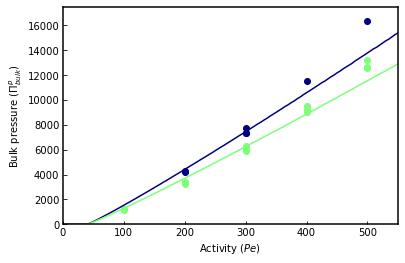

/opt/local/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in divide
  from ipykernel import kernelapp as app


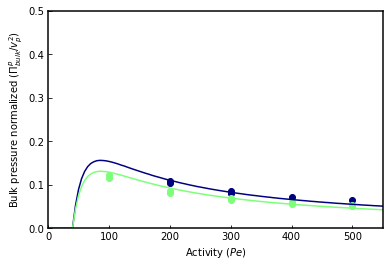

In [33]:
# Now plot the analytical approach with simulation overlaid
for i in range(0, len(distEps)):
    plt.plot(pes, pLJ[i], c=cols[i], lw=1.5)
    for j in range(0, len(params)):
        if params['eps'][j] == distEps[i] and not all_pres[j].empty:
            plt.scatter(params['peA'][j], all_pres[j]['bulkPress'], c=cols[distEps.index(params['eps'][j])])
plt.xlim(0., 550.)
plt.ylim(0., 17500.)
plt.xlabel(r'Activity $(Pe)$')
plt.ylabel(r'Bulk pressure $(\Pi^{p}_{bulk})$')
plt.show()

# Now plot the analytical approach with simulation overlaid
for i in range(0, len(distEps)):
    plt.plot(pes, pLJ[i]/pes**2, c=cols[i], lw=1.5)
    for j in range(0, len(params)):
        if params['eps'][j] == distEps[i] and not all_pres[j].empty:
            plt.scatter(params['peA'][j], all_pres[j]['bulkPress'] / params['peA'][j]**2,
                        c=cols[distEps.index(params['eps'][j])])
plt.xlim(0., 550.)
plt.ylim(0., 0.5)
plt.xlabel(r'Activity $(Pe)$')
plt.ylabel(r'Bulk pressure normalized $(\Pi^{p}_{bulk}/v_{p}^{2})$')
plt.show()

/opt/local/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in divide
  


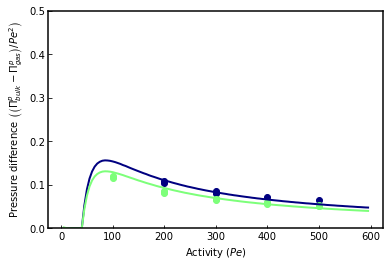

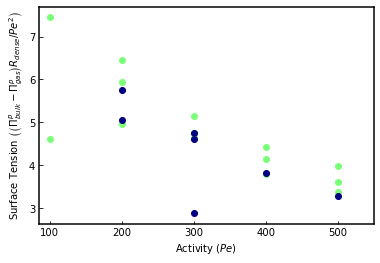

In [29]:
## Let's plot this like Brady does (y/x^2)
for j in range(0, len(all_pres)):
    if not all_pres[j].empty:
        plt.scatter(params['peA'][j], (all_pres[j]['bulkPress'] - all_pres[j]['gasPress']) / (params['peA'][j]**2),
                    c=cols[distEps.index(params['eps'][j])])

for i in range(0, len(distEps)): 
    plt.plot(pes, pLJ[i]/(pes**2), lw=2., c=cols[i], label=r'$tr(\sigma^{p})/2$')
plt.xlabel(r'Activity $(Pe)$')
plt.ylabel(r'Pressure difference $\left(\left(\Pi^{p}_{bulk}-\Pi^{p}_{gas}\right)/Pe^{2}\right)$')
# plt.xlim(85,550)
plt.ylim(0, 0.5)
# plt.ylim(0, 40000)
# plt.legend()
plt.show()

## Let's plot this like Brady does (y/x^2)
for j in range(0, len(all_pres)):
    if not all_pres[j].empty:
        plt.scatter(params['peA'][j], (all_pres[j]['bulkPress'] - all_pres[j]['gasPress']) * curv[j] / (params['peA'][j]**2),
                    c=cols[distEps.index(params['eps'][j])])

# for i in range(0, len(distEps)): 
#     plt.plot(pes, pLJ[i]/(pes**2), lw=2., c=cols[i], label=r'$tr(\sigma^{p})/2$')
# # plt.ylim(0, 0.5)
# # plt.ylim(0, 40000)
# # plt.legend()
plt.xlabel(r'Activity $(Pe)$')
plt.ylabel(r'Surface Tension $\left(\left(\Pi^{p}_{bulk}-\Pi^{p}_{gas}\right)R_{dense}/Pe^{2}\right)$')
plt.xlim(85,550)
plt.show()

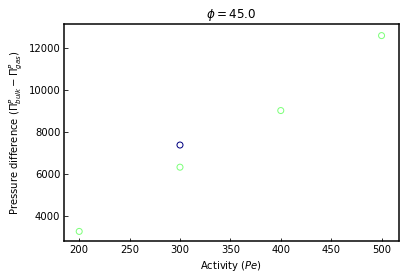

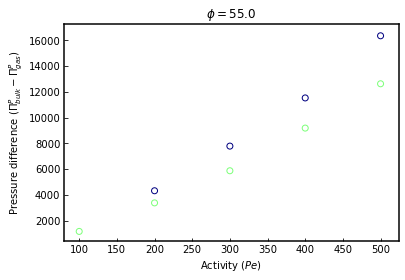

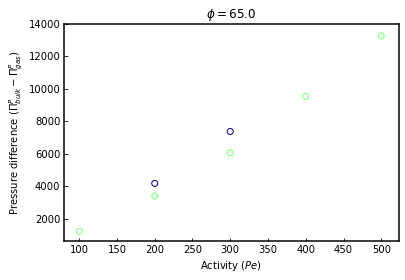

In [24]:
# Plot the pressure difference
for h in distPhi:
    for i in range(0, len(all_pres)):
        if params['phi'][i] != h:
            continue
        if not all_pres[i].empty:
            plt.scatter(params['peA'][i],
                        (all_pres[i]['bulkPress'][0] - all_pres[i]['gasPress'][0]) / (params['peA'][i]**0),
                        edgecolors=cols[distEps.index(params['eps'][i])], facecolor='none')
#     plt.xlim(0, 1000)
#     plt.ylim(0, 25000)
    plt.title(r'$\phi=$' + str(h))
    plt.xlabel(r'Activity $(Pe)$')
    plt.ylabel(r'Pressure difference $(\Pi^{P}_{bulk} - \Pi^{P}_{gas})$')
    plt.show()